In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ds_toolbox.modelling.time_series_utils as ts
import ds_toolbox.modelling.misc_utils as ds
from ds_toolbox.visualisation import corrplot, bokeh_chart, bokeh_candlestick, plot_colors

from bokeh.plotting import show, output_notebook
output_notebook()

pd.set_option("display.max_columns", None)

Loading BokehJS ...

In [2]:
raw = pd.read_csv("data/presidential_polls_2016.csv")

In [3]:
raw.createddate = pd.to_datetime(raw.createddate)

## Polls vs actuals

### load 2016 actuals

In [4]:
# multindex
state_shares = pd.read_csv("data/processed/state_shares.csv", index_col=[0], header=[0, 1], parse_dates=True)

### single state

In [5]:
state = "Pennsylvania"
plot_df = raw[raw.state == state].set_index("createddate").sort_index()
plot_df = plot_df[["rawpoll_trump", "rawpoll_clinton"]]
plot_df_roll = plot_df.rolling(window=10, min_periods=3).mean()
plot_df_roll.columns = ["trump_ave", "clinton_ave"]
plot_df = plot_df.merge(plot_df_roll, left_index=True, right_index=True, how="left")

# fig = bokeh_chart(plot_df[["rawpoll_trump", "rawpoll_clinton"]],
#                   legend_labels=["rep", "dem"], 
#                   colors=["red", "dodgerblue"], linestyle="line", title=state)
# show(fig)

In [6]:
party_colors = ['red', 'dodgerblue']

### all battlegrounds

In [7]:
battlegrounds = ['Arizona',
 'Colorado',
 'Florida',
 'Georgia',
 'Iowa',
 'Maine',
 'Michigan',
 'Minnesota',
 'Nevada',
 'New Hampshire',
 'New Mexico',
 'North Carolina',
 'Ohio',
 'Pennsylvania',
 'Texas',
 'Virginia',
 'Wisconsin']

In [24]:
pd.DataFrame??

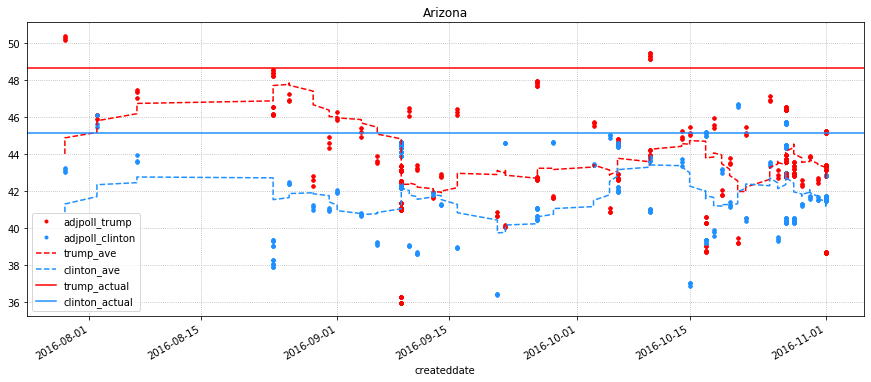

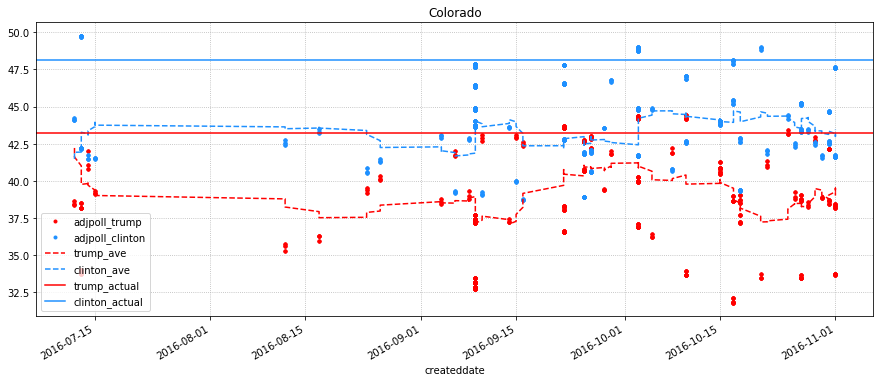

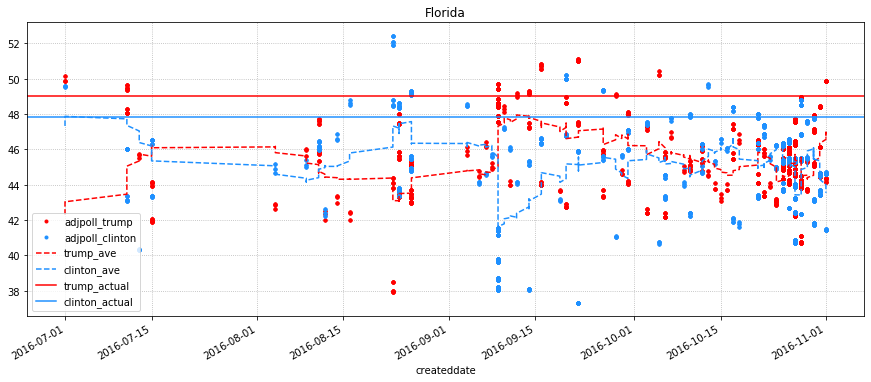

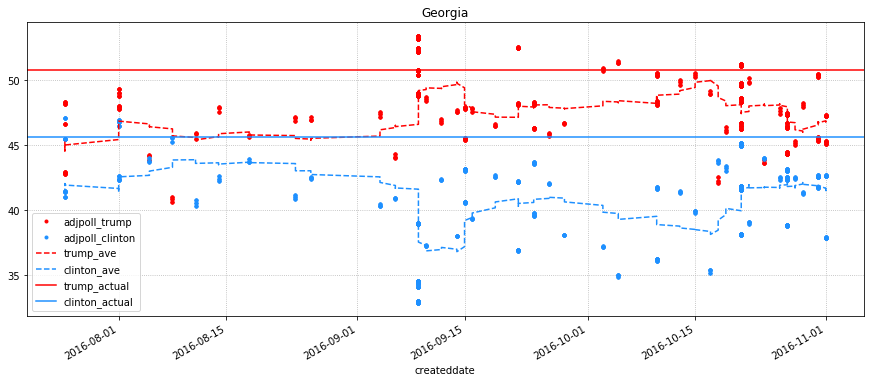

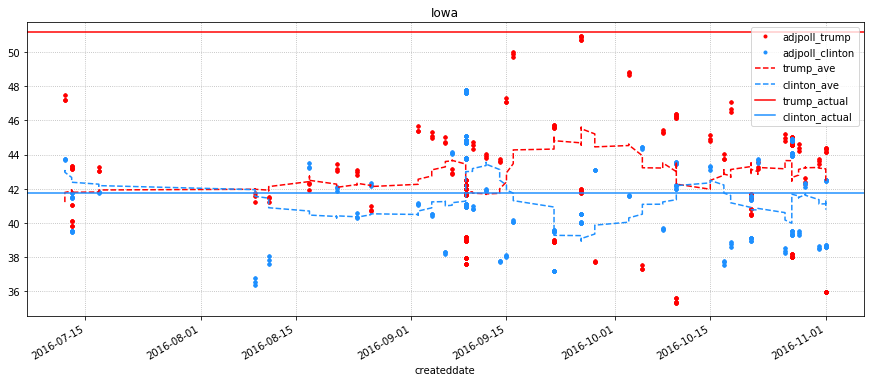

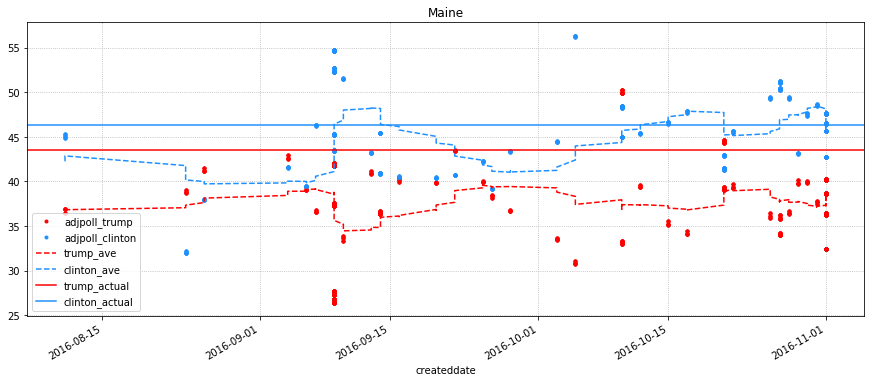

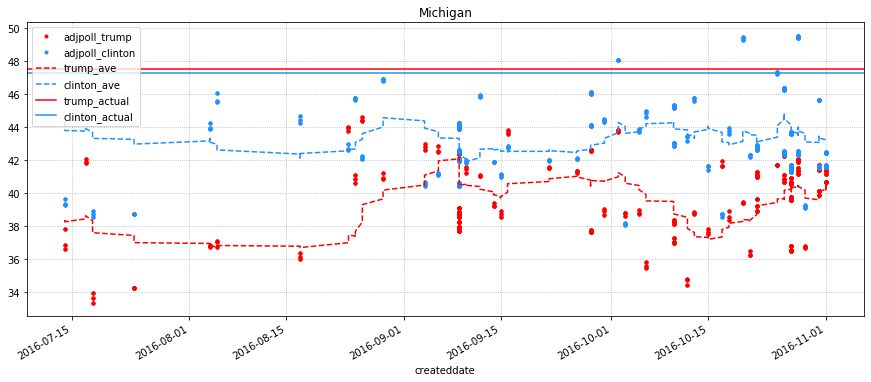

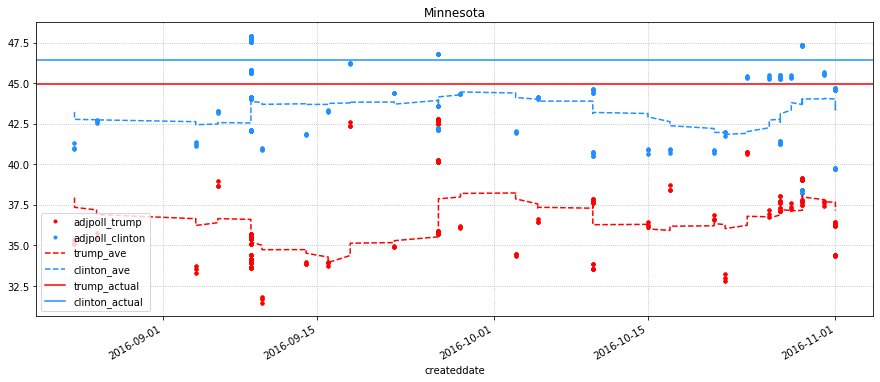

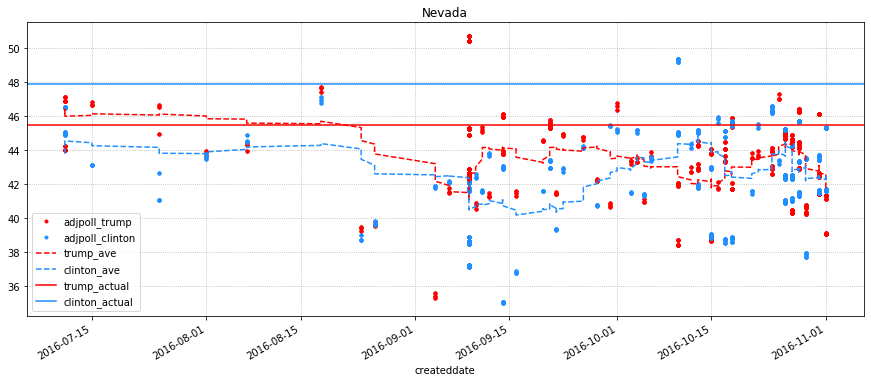

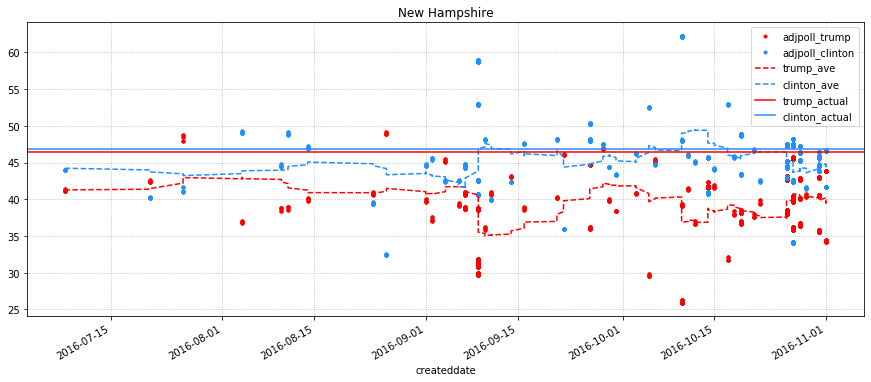

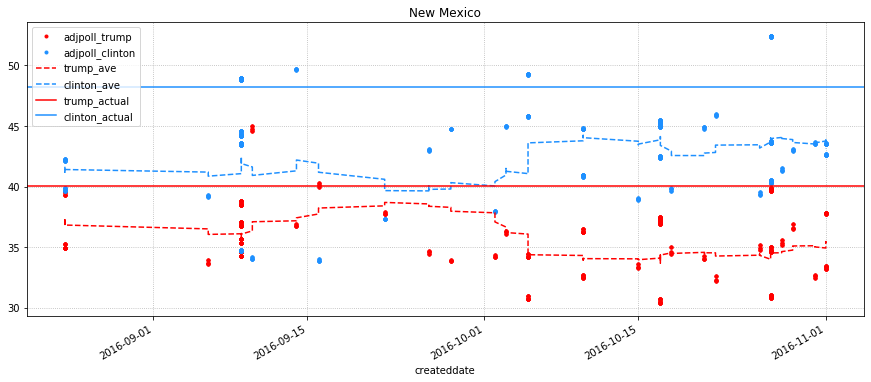

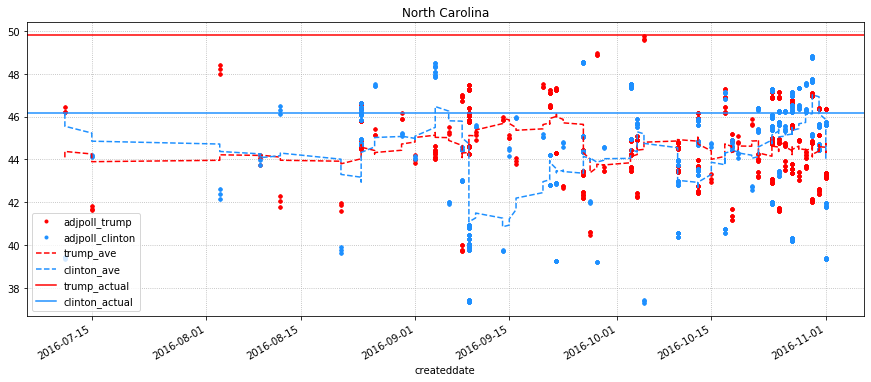

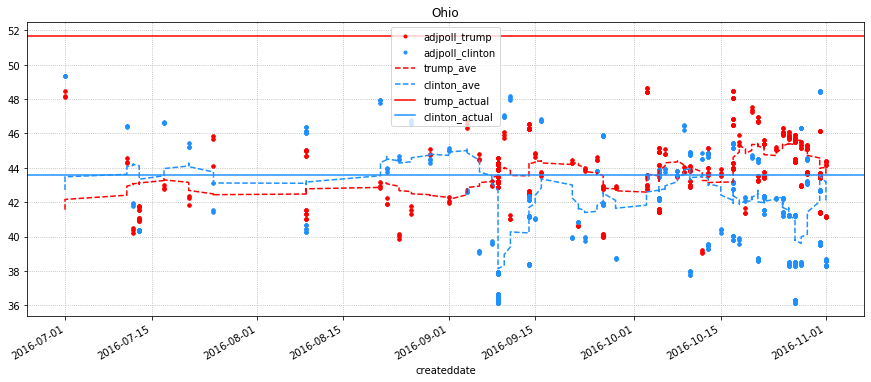

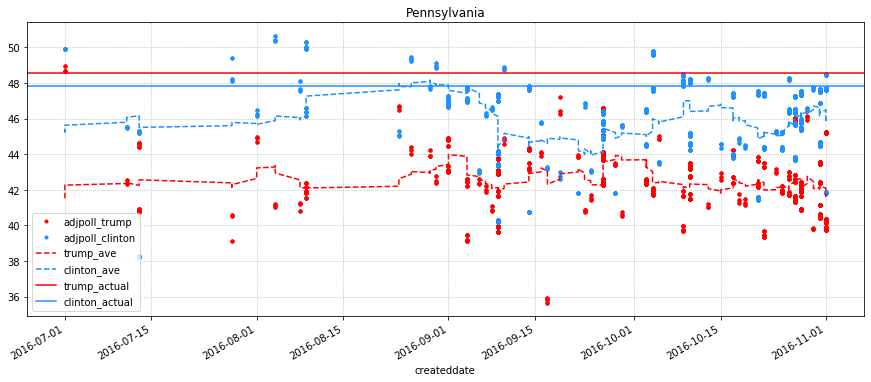

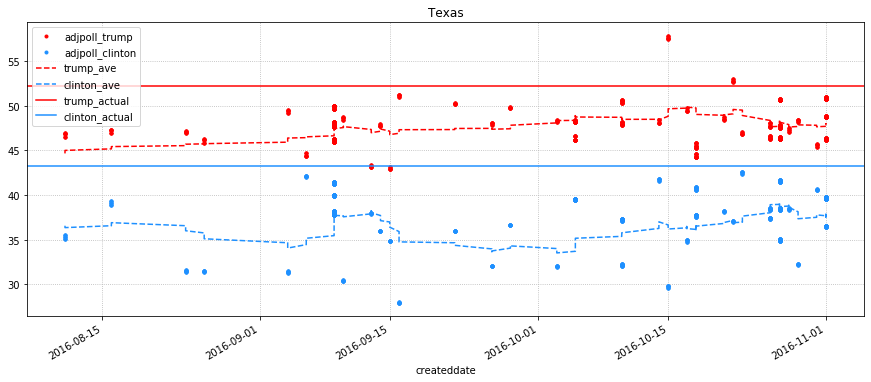

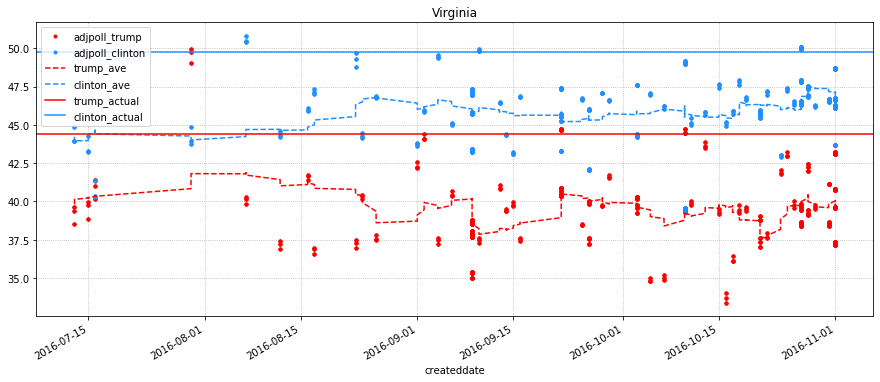

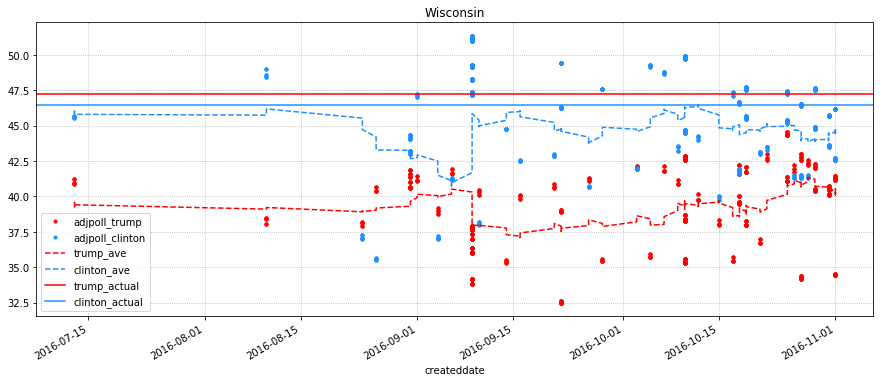

In [32]:
start_date = "2016-07-01"

for state in battlegrounds:

    plot_df = raw[raw.state == state].set_index("createddate").sort_index()
    plot_df = plot_df[["adjpoll_trump", "adjpoll_clinton"]]
    plot_df_roll = plot_df.rolling(window=20, min_periods=3).mean()
    plot_df_roll.columns = ["trump_ave", "clinton_ave"]
    plot_df = plot_df.merge(plot_df_roll, left_index=True, right_index=True, how="left")
    
    ts.plot(plot_df, style=[".", ".", "--", "--"], start_date=start_date, color=2*party_colors)
    
    dem_result = state_shares.loc["2016", state].democrat[0]
    rep_result = state_shares.loc["2016", state].republican[0]
    
    x = pd.DataFrame(index=plot_df.index, 
                     columns=["rep_result", "dem_result"], 
                     data=[[rep_result, dem_result]])
    plot_df.merge(x, left_index=True, right_index=True).to_csv(f"data/processed/2016_polls/{state}.csv")
    
    
    plt.axhline(y=rep_result, linestyle="-", color="red", label="trump_actual");
    plt.axhline(y=dem_result, linestyle="-", color="dodgerblue", label="clinton_actual");
    plt.title(state)
    plt.legend()
    plt.show()

## Calculate "shy Trump" factor

In [10]:
rep_result

47.21818456731011

In [14]:
rep_result - plot_df_roll.trump_ave[-1]

7.110312067310105

In [22]:
start_date = "2016-07-01"
dict_shy_trump = {}
dict_shy_biden = {}


for state in battlegrounds:

    plot_df = raw[raw.state == state].set_index("createddate").sort_index()
    plot_df = plot_df[["adjpoll_trump", "adjpoll_clinton"]]
    plot_df_roll = plot_df.rolling(window=20, min_periods=3).mean()
    plot_df_roll.columns = ["trump_ave", "clinton_ave"]
    plot_df = plot_df.merge(plot_df_roll, left_index=True, right_index=True, how="left")

    rep_result = state_shares.loc["2016", state].republican[0]
    
    trump_factor = rep_result - plot_df_roll.trump_ave[-1]
    biden_factor = dem_result - plot_df_roll.clinton_ave[-1]

    dict_shy_trump[state] = round(trump_factor, 3)
    dict_shy_biden[state] = round(biden_factor, 3)

In [23]:
dict_shy_biden

{'Arizona': 4.843,
 'Colorado': 3.011,
 'Florida': 2.91,
 'Georgia': 4.883,
 'Iowa': 5.674,
 'Maine': 0.363,
 'Michigan': 3.213,
 'Minnesota': 2.769,
 'Nevada': 4.075,
 'New Hampshire': 1.956,
 'New Mexico': 3.303,
 'North Carolina': 2.516,
 'Ohio': 4.382,
 'Pennsylvania': 0.442,
 'Texas': 8.708,
 'Virginia': 0.059,
 'Wisconsin': 1.752}